In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider, IntSlider

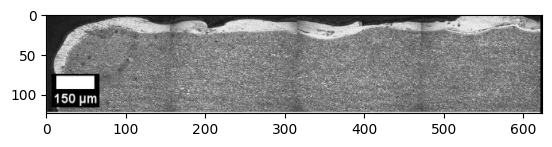

In [66]:
img = cv2.imread("images/0.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

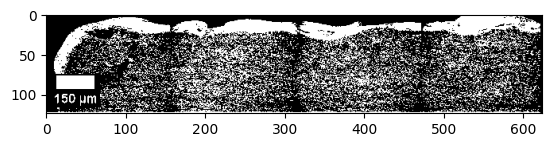

In [76]:
ret, thresh = cv2.threshold(img, 0, 255,
                            cv2.THRESH_BINARY +
                            cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

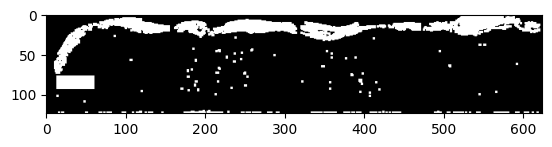

In [81]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

In [57]:
simple_morphological_widget(edges)

interactive(children=(IntSlider(value=3, description='Kernel Size:', max=15, min=3, step=2), IntSlider(value=2…

<function __main__.simple_morphological_widget.<locals>.update_morphology(kernel_size, closing_iterations, dilation_iterations, distance_threshold)>

In [83]:
# erosion
# dilation
# opening
# closing

In [167]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()

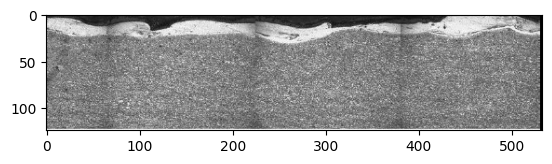

In [168]:
img = cv2.imread("images/final.png", cv2.IMREAD_GRAYSCALE)
show(img)

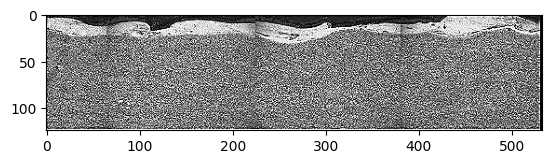

In [174]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(img, -1, kernel)
show(sharpened_image)

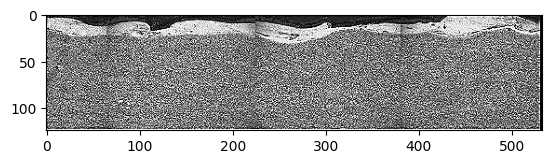

In [151]:
show(cv2.fastNlMeansDenoising(sharpened_image, None, h=10, templateWindowSize=20, searchWindowSize=50))

Number of contours found: 3506


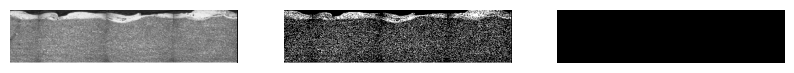

In [164]:
_, thresh = cv2.threshold(sharpened_image, 190, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = np.zeros_like(img)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

print(f"Number of contours found: {len(contours)}")

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(img, cmap='gray')
axs[0].axis('off')
axs[1].imshow(thresh, cmap='gray')
axs[1].axis('off')
axs[2].imshow(contour_img, cmap='gray')
axs[2].axis('off')
plt.show()